In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl
import lxml.html as lh
import seaborn as sns

In [52]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
url = 'https://10times.com/conferences'
print("Opening the file connection...")
uh= urllib.request.urlopen(url, context=ctx)
print("HTTP status",uh.getcode())
html =uh.read().decode()
print(f"Reading done. Total {len(html)} characters read.")

Opening the file connection...
HTTP status 200
Reading done. Total 148484 characters read.


In [7]:
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Conferences, Seminars, Summits, Meetings - Find &amp; Compare, Reviews, Calendar
  </title>
  <meta content="Find and compare 260932 international, national and regional conferences across categories. World's #1 directory of largest conferences, global seminars, international summits, meetings &amp; forums. Used by over 4 million event goers worldwide to read reviews, bookmark upcoming dates, find popular conferences to attend, become speaker, exhibit by country, location, city, category &amp; industry around the world in 2019, 2020, 2021 &amp; 2022." name="description">
   <meta content="app-id=820954054" name="apple-itunes-app"/>
   <meta content="10timesevents" property="fb:admins">
    <meta content="172404889604820" property="fb:app_id">
     <meta content="#ffffff" name="the

In [8]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

/
/tradeshows
/conferences
https://10times.com/top100
https://10times.com/online
javascript:(void);
https://10times.com/workshops
https://10times.com/venues
https://10times.com/company
javascript:void(0);
javascript:void(0);
javascript:void(0);
https://odash.10times.com/addevent
https://login.10times.com/eventmarketing
/app
/events
https://10times.com/top100
/online/conferences
https://odash.10times.com/addevent
/education-training/conferences
/technology/conferences
/medical-pharma/conferences
/business-consultancy/conferences
javascript:void(0);
javascript:void(0);
javascript:void(0);
https://10times.com/ethical-hacking-training-hyderabad
https://10times.com/ethical-hacking-training-hyderabad
https://10times.com/hyderabad-in
https://10times.com/india
https://10times.com/education-training/conferences
https://10times.com/technology/conferences
javascript:void(0)
https://10times.com/ethical-hacking-training-hyderabad/visitors
javascript:void(0)
javascript:void(0)
https://10times.com/cy

In [9]:
soup.find_all('a')

[<a href="/"><img alt="10times" src="https://im.gifbt.com/images/bootlogo.png" style="max-width: 100%;"/></a>,
 <a href="/tradeshows">Trade Shows</a>,
 <a href="/conferences">Conferences</a>,
 <a href="https://10times.com/top100">Top 100</a>,
 <a href="https://10times.com/online">Online Events</a>,
 <a aria-expanded="false" aria-haspopup="true" class="dropdown-toggle" data-toggle="dropdown" href="javascript:(void);" role="button"> <span style="text-decoration: none;">More</span> 
                                             <span class="fa fa-angle-double-right" id="more-events" style="text-decoration: none;"></span></a>,
 <a href="https://10times.com/workshops" role="menuitem">Workshops</a>,
 <a href="https://10times.com/venues" role="menuitem">Venues</a>,
 <a href="https://10times.com/company" role="menuitem">Companies</a>,
 <a href="javascript:void(0);" id="user_loc"> <span id="loc_name" style="text-decoration: none !important;">Nearby Events</span></a>,
 <a class="x-thm" href="java

In [10]:
rows = soup.find_all('tr')
print(rows[:])

[<tr><th>Date</th><th>Event Name</th><th>Venue</th><th>Description</th><th>Type</th><th></th></tr>, <tr class="box"><td class="text-drkr" data-localizer="ignore"><img alt="" class="lazy pull-right" data-src="https://im.10times.com/1.png?c=web&amp;s=eventlisting&amp;p=eventsnippet&amp;e=991855,992318,997227&amp;k=0e136723f388badbf398dab00a86bf37" src="https://im.10times.com/0.png"/><data class="eventTime" data-end-date="2020-04-14" data-end-time="" data-start-date="2020-04-02" data-start-time="" data-status="active" data-timezone="" data-timezone-country="">Thu, 02  - Tue, 14 Apr 2020</data></td><td><a href="https://10times.com/ethical-hacking-training-hyderabad" target="_blank"><img alt="eth" class="lazy ml-5 mb-5 br pull-right" src="https://im.gifbt.com/event/zc7694cb62f67a580672e96939a93f8e/1584763241910/eventlogo-32-1578547424.jpg" width="70"/></a><h2 data-edition="991855" id="461909"><a href="https://10times.com/ethical-hacking-training-hyderabad" target="_blank">                Et

In [12]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td class="text-right" style="5em"><img alt="" class="lazy pull-right" data-src="https://im.10times.com/1.png?c=web&amp;s=eventlisting&amp;p=justlisted&amp;e=1012841,1013055&amp;k=7a0d0547d641cd20c73bfa6ecad5ac27" src="https://im.10times.com/0.png"/>Sep 01<small class="block">2020</small></td>, <td><a href="/insider-threat-day-laurel" target="_blank">Insider Threat Day</a><small class="block">Laurel, United States</small></td>]


bs4.element.ResultSet

In [13]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[Sep 012020, Insider Threat DayLaurel, United States]


In [14]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[Sep 012020, Insider Threat DayLaurel, United States]


str

In [15]:
df = pd.DataFrame(list_rows)
df.head(100)

,0
0,[]
1,"[Thu, 02 - Tue, 14 Apr 2020, ..."
2,"[Thu, 02 - Tue, 14 Apr 2020, ..."
3,[ Instant Medi-Marketing MiracleNew York Save ...
4,"[Thu, 02 - Tue, 14 Apr 2020, ..."
5,[]
6,"[Thu, 02 - Tue, 14 Apr 2020, ..."
7,"[Thu, 02 - Tue, 14 Apr 2020, ..."
8,"[Thu, 02 - Tue, 14 Apr 2020, ..."
9,"[Tue, 07 - Tue, 14 Apr 2020, ..."


In [16]:
df1 = df[0].str.split(',', expand=True)
df1.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,[Thu,02 - Tue,14 Apr 2020,Ethical Hacking Training (Eth...,Hyderabad ...,\n India,Increase the security lock,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
2,[Thu,02 - Tue,14 Apr 2020,Cyber Security Training (Cybe...,Illinois ...,\n USA,Free demo,IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
3,[ Instant Medi-Marketing MiracleNew York Save ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,[Thu,02 - Tue,14 Apr 2020,Blockchain Training (Blockcha...,New York ...,\n USA,Free Demo Online,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
5,[],None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,[Thu,02 - Tue,14 Apr 2020,Powershell Training (Powershe...,Bengaluru ...,\n India,FREE DEMO online,Education &amp; Training,Interested \n ...,None,None,None,None,None,None
7,[Thu,02 - Tue,14 Apr 2020,SAP FICO Training (Certificat...,Bengaluru ...,\n India,SAP FICO TrainingSAP FICO is the Finance and ...,where FI Means to Financial Accounting,and CO Means to Controlling. SAP FICO module ...,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None
8,[Thu,02 - Tue,14 Apr 2020,SAP ABAP Training (ABAP Course),Hyderabad ...,\n India,FREE Demo !,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
9,[Tue,07 - Tue,14 Apr 2020,Cyberark Training (Cyberark c...,New York ...,\n USA,Free demo for register members,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None


In [17]:
df1[0] = df1[0].str.strip('[')
df1.head(55)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,],None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Thu,02 - Tue,14 Apr 2020,Ethical Hacking Training (Eth...,Hyderabad ...,\n India,Increase the security lock,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
2,Thu,02 - Tue,14 Apr 2020,Cyber Security Training (Cybe...,Illinois ...,\n USA,Free demo,IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
3,Instant Medi-Marketing MiracleNew York Save E...,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Thu,02 - Tue,14 Apr 2020,Blockchain Training (Blockcha...,New York ...,\n USA,Free Demo Online,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
5,],None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,Thu,02 - Tue,14 Apr 2020,Powershell Training (Powershe...,Bengaluru ...,\n India,FREE DEMO online,Education &amp; Training,Interested \n ...,None,None,None,None,None,None
7,Thu,02 - Tue,14 Apr 2020,SAP FICO Training (Certificat...,Bengaluru ...,\n India,SAP FICO TrainingSAP FICO is the Finance and ...,where FI Means to Financial Accounting,and CO Means to Controlling. SAP FICO module ...,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None
8,Thu,02 - Tue,14 Apr 2020,SAP ABAP Training (ABAP Course),Hyderabad ...,\n India,FREE Demo !,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
9,Tue,07 - Tue,14 Apr 2020,Cyberark Training (Cyberark c...,New York ...,\n USA,Free demo for register members,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None


In [18]:
col_labels = soup.find_all('th')

In [19]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Date, Event Name, Venue, Description, Type, ]']


In [20]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Date, Event Name, Venue, Description, Type, ]"


In [21]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5
0,[Date,Event Name,Venue,Description,Type,]


In [22]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(54)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,[Date,Event Name,Venue,Description,Type,],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,],None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Thu,02 - Tue,14 Apr 2020,Ethical Hacking Training (Eth...,Hyderabad ...,\n India,Increase the security lock,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
2,Thu,02 - Tue,14 Apr 2020,Cyber Security Training (Cybe...,Illinois ...,\n USA,Free demo,IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
3,Instant Medi-Marketing MiracleNew York Save E...,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Thu,02 - Tue,14 Apr 2020,Blockchain Training (Blockcha...,New York ...,\n USA,Free Demo Online,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
5,],None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,Thu,02 - Tue,14 Apr 2020,Powershell Training (Powershe...,Bengaluru ...,\n India,FREE DEMO online,Education &amp; Training,Interested \n ...,None,None,None,None,None,None
7,Thu,02 - Tue,14 Apr 2020,SAP FICO Training (Certificat...,Bengaluru ...,\n India,SAP FICO TrainingSAP FICO is the Finance and ...,where FI Means to Financial Accounting,and CO Means to Controlling. SAP FICO module ...,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None
8,Thu,02 - Tue,14 Apr 2020,SAP ABAP Training (ABAP Course),Hyderabad ...,\n India,FREE Demo !,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None


In [23]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Date,Event Name,Venue,Description,Type,],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,[Date,Event Name,Venue,Description,Type,],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,],None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Thu,02 - Tue,14 Apr 2020,Ethical Hacking Training (Eth...,Hyderabad ...,\n India,Increase the security lock,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
2,Thu,02 - Tue,14 Apr 2020,Cyber Security Training (Cybe...,Illinois ...,\n USA,Free demo,IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
3,Instant Medi-Marketing MiracleNew York Save E...,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [24]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 55
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   [Date         57 non-null     object
 1    Event Name   51 non-null     object
 2    Venue        50 non-null     object
 3    Description  41 non-null     object
 4    Type         41 non-null     object
 5    ]            41 non-null     object
 6   nan           40 non-null     object
 7   nan           40 non-null     object
 8   nan           40 non-null     object
 9   nan           27 non-null     object
 10  nan           22 non-null     object
 11  nan           13 non-null     object
 12  nan           12 non-null     object
 13  nan           6 non-null      object
 14  nan           2 non-null      object
dtypes: object(15)
memory usage: 7.1+ KB


(57, 15)

In [37]:
df5.iloc[0:49,0:4]

,[Date,Event Name,Venue,Description
0,[Date,Event Name,Venue,Description
0,],None,None,None
1,Thu,02 - Tue,14 Apr 2020,Ethical Hacking Training (Eth...
2,Thu,02 - Tue,14 Apr 2020,Cyber Security Training (Cybe...
3,Instant Medi-Marketing MiracleNew York Save E...,None,None,None
4,Thu,02 - Tue,14 Apr 2020,Blockchain Training (Blockcha...
5,],None,None,None
6,Thu,02 - Tue,14 Apr 2020,Powershell Training (Powershe...
7,Thu,02 - Tue,14 Apr 2020,SAP FICO Training (Certificat...
8,Thu,02 - Tue,14 Apr 2020,SAP ABAP Training (ABAP Course)


In [101]:
df5.rename(columns={'[Date': 'Date'},inplace=True)
df5.rename(columns={' NaN]': 'NaN'},inplace=True)
df5.head()

,Date,Event Name,Venue,Description,Type,],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,[Date,Event Name,Venue,Description,Type,],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,],None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Thu,02 - Tue,14 Apr 2020,Ethical Hacking Training (Eth...,Hyderabad ...,\n India,Increase the security lock,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
2,Thu,02 - Tue,14 Apr 2020,Cyber Security Training (Cybe...,Illinois ...,\n USA,Free demo,IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
3,Instant Medi-Marketing MiracleNew York Save E...,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [81]:
df5["Date"]

0                                                 [Date
0                                                     ]
1                                                   Thu
2                                                   Thu
3      Instant Medi-Marketing MiracleNew York Save E...
4                                                   Thu
5                                                     ]
6                                                   Thu
7                                                   Thu
8                                                   Thu
9                                                   Tue
10                                                  Fri
11                                                  Fri
12                                                  Sat
13                                                  Sun
14                                                  Sun
15                                                  Mon
16                                              

In [69]:
df5




,Date,Event Name,Venue,Description,Type,],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,[Date,Event Name,Venue,Description,Type,],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,],None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Thu,02 - Tue,14 Apr 2020,Ethical Hacking Training (Eth...,Hyderabad ...,\n India,Increase the security lock,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
2,Thu,02 - Tue,14 Apr 2020,Cyber Security Training (Cybe...,Illinois ...,\n USA,Free demo,IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
3,Instant Medi-Marketing MiracleNew York Save E...,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Thu,02 - Tue,14 Apr 2020,Blockchain Training (Blockcha...,New York ...,\n USA,Free Demo Online,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
5,],None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,Thu,02 - Tue,14 Apr 2020,Powershell Training (Powershe...,Bengaluru ...,\n India,FREE DEMO online,Education &amp; Training,Interested \n ...,None,None,None,None,None,None
7,Thu,02 - Tue,14 Apr 2020,SAP FICO Training (Certificat...,Bengaluru ...,\n India,SAP FICO TrainingSAP FICO is the Finance and ...,where FI Means to Financial Accounting,and CO Means to Controlling. SAP FICO module ...,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None
8,Thu,02 - Tue,14 Apr 2020,SAP ABAP Training (ABAP Course),Hyderabad ...,\n India,FREE Demo !,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None


In [86]:
df5.tail()

,Date,Event Name,Venue,Description,Type,],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Apr 182020,Data Science and Machine L..New Delhi,India],None,None,None,None,None,None,None,None,None,None,None,None
52,Apr 182020,Mind Mapping Training for ..New Delhi,India],None,None,None,None,None,None,None,None,None,None,None,None
53,Apr 212020,AI- The Ultimate Weapon in..Online],None,None,None,None,None,None,None,None,None,None,None,None,None
54,Sep 012020,International Conference o..Jakarta,Indonesia],None,None,None,None,None,None,None,None,None,None,None,None
55,Sep 012020,Insider Threat DayLaurel,United States],None,None,None,None,None,None,None,None,None,None,None,None


In [110]:
df5.head()

,Date,Event Name,Venue,Description,Type,],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,[Date,Event Name,Venue,Description,Type,],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,],None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Thu,02 - Tue,14 Apr 2020,Ethical Hacking Training (Eth...,Hyderabad ...,\n India,Increase the security lock,Education &amp; Training IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
2,Thu,02 - Tue,14 Apr 2020,Cyber Security Training (Cybe...,Illinois ...,\n USA,Free demo,IT &amp; Technology,Interested \n ...,None,None,None,None,None,None
3,Instant Medi-Marketing MiracleNew York Save E...,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [114]:
df5['Date'].head()

0                                                [Date
0                                                    ]
1                                                  Thu
2                                                  Thu
3     Instant Medi-Marketing MiracleNew York Save E...
Name: Date, dtype: object

In [122]:
df5.iloc[4]

Date             Instant Medi-Marketing MiracleNew York Save E...
 Event Name                                                  None
 Venue                                                       None
 Description                                                 None
 Type                                                        None
 ]                                                           None
NaN                                                          None
NaN                                                          None
NaN                                                          None
NaN                                                          None
NaN                                                          None
NaN                                                          None
NaN                                                          None
NaN                                                          None
NaN                                                          None
Name: 3, d

In [126]:
df5.loc[45]

Date                                                          Mon
 Event Name                                             13  - Tue
 Venue                                                14 Apr 2020
 Description                     International Conference on A...
 Type               Macro and Empirical Finance (AMEF)6th edition
 ]                Thessaloniki                                ...
NaN                              \n                        Greece
NaN                    International Conference on Applied Theory
NaN              Macro and Empirical Finance aim is to bring t...
NaN                                                young scholars
NaN              post-doctoral researchers and Ph.D. students ...
NaN                Education &amp; Training Banking &amp; Finance
NaN                Interested \n                              ...
NaN                                                          None
NaN                                                          None
Name: 45, 

In [133]:
df5.iloc[:,[0,1,3]]

,Date,Event Name,Description
0,[Date,Event Name,Description
0,],None,None
1,Thu,02 - Tue,Ethical Hacking Training (Eth...
2,Thu,02 - Tue,Cyber Security Training (Cybe...
3,Instant Medi-Marketing MiracleNew York Save E...,None,None
4,Thu,02 - Tue,Blockchain Training (Blockcha...
5,],None,None
6,Thu,02 - Tue,Powershell Training (Powershe...
7,Thu,02 - Tue,SAP FICO Training (Certificat...
8,Thu,02 - Tue,SAP ABAP Training (ABAP Course)


In [155]:
print('NUMBER OF DAYS')
df5.iloc[:,0].count()

NUMBER OF DAYS


57

In [156]:
print("COUNTING OF EVENTS")
df5.iloc[:,1].count()

COUNTING OF EVENTS


51

In [164]:
print("EVENTS HELD IN DATE 02-TUE")
df5.iloc[[1,2,3,4,5,6,7,],[0,3]]

EVENTS HELD IN DATE 02-TUE


,Date,Description
0,],None
1,Thu,Ethical Hacking Training (Eth...
2,Thu,Cyber Security Training (Cybe...
3,Instant Medi-Marketing MiracleNew York Save E...,None
4,Thu,Blockchain Training (Blockcha...
5,],None
6,Thu,Powershell Training (Powershe...


In [163]:
df5.iloc[[1,2,3,4,5,6,7,],[0,3]].count()

Date            7
 Description    4
dtype: int64

In [167]:
df5.groupby(["Date"]).size()

Date
 Instant Medi-Marketing MiracleNew York Save EPTKSeoul Save 3FDongguan Save]     1
Apr 182020                                                                       7
Apr 212020                                                                       1
Fri                                                                              2
Mon                                                                             28
Sat                                                                              1
Sep 012020                                                                       2
Sun                                                                              2
Thu                                                                              6
Tue                                                                              1
[Date                                                                            1
]                                                                                5

In [202]:

start_date = datetime(2019, 6, 11)
end_date = start_date + timedelta(days=365)

random.seed(91827364)

data = {
        'timestamp' : list(map(
                                lambda r: start_date + (end_date - start_date) * r, 
                                [random.random() for i in range(100)]
                            )),
        'item' : random.choices(['2019','2020','2020','2020','2019'], k=100),
        'itemcount' : [random.randrange(1,20) for i in range(100)]
       }

dfTimes = pd.DataFrame.from_dict(data)

dfTimes.head()

,timestamp,item,itemcount
0,2019-10-01 22:06:54.395263,2019,2
1,2019-10-30 03:28:50.836578,2020,3
2,2020-03-02 11:04:30.646328,2019,7
3,2020-03-25 01:11:38.024970,2019,4
4,2019-09-12 00:20:44.827208,2019,4


Text(0, 0.5, 'NUMBER OF EVENTS')

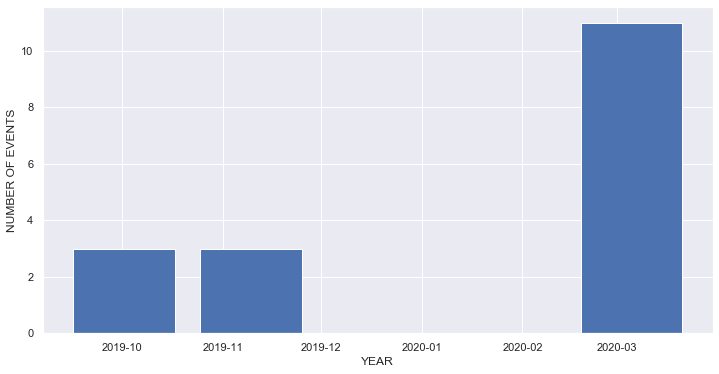

In [206]:
from datetime import datetime
plt.figure(figsize=(12, 6))
dates = [datetime(2019, 10, 1)] * 2 + \
        [datetime(2019, 10, 30)] * 3 + \
        [datetime(2020, 3, 2)] * 7 + \
        [datetime(2020, 3, 25)] * 4 + \
        [datetime(2019, 9, 12)] * 1
plt.hist(dates, bins=5, rwidth=0.8)
plt.xlabel('YEAR')
plt.ylabel('NUMBER OF EVENTS')

ValueError: 'label' must be of length 'x'

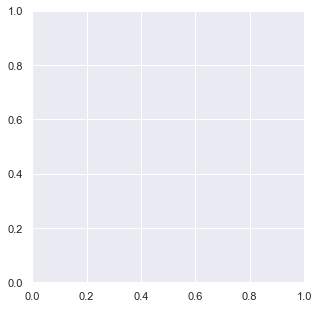